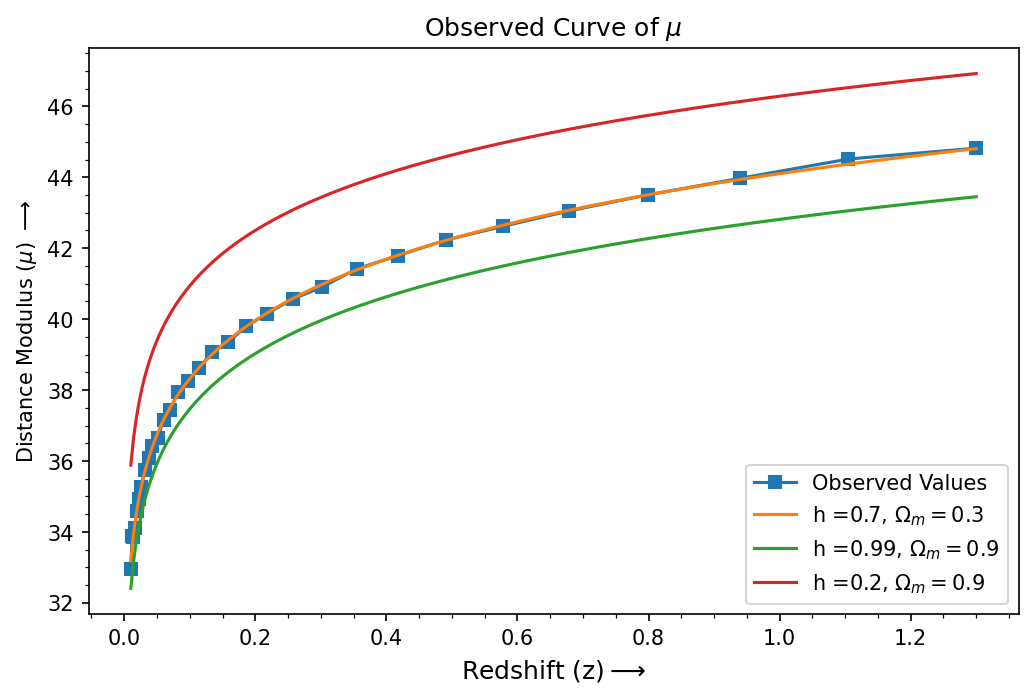

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:106: RuntimeWarning: overflow encountered in exp


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import math

# Number of Supernova in Observed Data
num_of_SN = 31
"""Importing Observed Supernova Data """

# Redshift and Observed Mu Data
f = open('Redshift_Mu.txt', 'r')
data = np.loadtxt(f)
f.close()
z = data[:, 0]
Mu_Observed =data[:, 1]

# Covariance Matrix Data
f = open('Cov_Matrix.txt', 'r')
Cov_Mat = np.loadtxt(f)
Cov_Mat = np.reshape(Cov_Mat, (num_of_SN, num_of_SN))
f.close()

# CALCULATING INVERSE OF COVARIANCE MATRIX
Inv_Cov = np.empty([num_of_SN, num_of_SN])
Inv_Cov = np.linalg.inv(Cov_Mat)

# Creating an array for storing difference in Observed Mu and Calculated Mu Value from Model
Diff_Mu =  np.empty(num_of_SN)

# Defining Distance Modulud Model function
def Distance_Modu_Model(h, Omega_m, z ):
    DL_star = DL_dist(1, Omega_m, z)
    mu_model = 25.0 - 5.0*np.log10(h) + 5.0 * np.log10(DL_star)
    # Here DL_star is in Mpc.
    return mu_model

# Defining the Eta function, it is required to calculating DL
def Eta(a, Omega_m):
    s = ((1 - Omega_m)/Omega_m)**(1.0/3.0)
    Value = 2 * np.sqrt(1 + s**3) * (1/(a**4) - 0.1540 * s /(a**3 )
            + 0.4304 * (s**2) /(a**2) + 0.19097 * (s**3)/a + 0.066941 * s**4)**(-1/8)
    return Value

# Defining Luminosity distance
def DL_dist(h, Omega_m, z):
    distance = (3000/h)*(1.0 + z)*(Eta(1.0, Omega_m) - Eta(1.0/(1.0 + z), Omega_m))
    return distance

# Calculating the logaritham of Likelihood 
def log_likelihood(h, Omega_m):
    if h > 0 and h < 1 and 0 < Omega_m and Omega_m < 1 :
        for i in range(num_of_SN):
            Diff_Mu[i] = Mu_Observed[i] - Distance_Modu_Model(h, Omega_m, z[i])
            lnL = -0.5 * np.dot(Diff_Mu, np.dot(Inv_Cov , Diff_Mu))
    else:
        lnL = -1 * 10**100
    
    return lnL

# Defining Empty array for Storing Calculated value of Mu form the Model
npts = 300
z_plot =  np.linspace(0.01, 1.3, npts)
Mu_plot = np.empty(npts)

""" Plotting few theoretical Curves for Mu with different value 
of Omega_m and h around the observed Data of Mu """

plt.figure(figsize = [8,5], dpi = 150)
plt.plot(z,Mu_Observed, 's-', label = 'Observed Values') # Observed Curve
for i in range(npts):
    Mu_plot[i] = Distance_Modu_Model(0.7, 0.3, z_plot[i])
plt.plot(z_plot, Mu_plot, label = r'h =0.7, $\Omega_m = 0.3$')

for i in range(npts):
    Mu_plot[i] = Distance_Modu_Model(0.99, 0.9, z_plot[i])
plt.plot(z_plot, Mu_plot,label =r'h =0.99, $\Omega_m = 0.9$')

for i in range(npts):
    Mu_plot[i] = Distance_Modu_Model(0.2, 0.9, z_plot[i])
plt.plot(z_plot, Mu_plot, label =r'h =0.2, $\Omega_m = 0.9$')
plt.ylabel(r"Distance Modulus $(\mu)~\longrightarrow$", fontsize = 10)
plt.xlabel(r"Redshift (z)$\longrightarrow$", fontsize = 12)
plt.title("Observed Curve of $\mu$")
plt.legend()
plt.minorticks_on()
plt.savefig("MuVsZ.png")
plt.show()

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#

# Starting Sample 
Num_samples = 1000
# Random initial Point
Omega_m_accept = [rnd.uniform(0, 1)]
h_accept = [rnd.uniform(0, 1)]
Prob = np.array([0])

for i in range(Num_samples):
    # Generating Random numbers
    Omega_m_rand = np.random.normal(Omega_m_accept[-1], 0.01)
    h_rand = np.random.normal(h_accept[-1], 0.01)
    # Variable for storing probability

    Log_New_Like = log_likelihood(h_rand, Omega_m_rand)

    Accept_prob = min(np.exp(Log_New_Like - log_likelihood(h_accept[-1], Omega_m_accept[-1])), 1)

    if rnd.uniform(0,1) < Accept_prob:
        h_accept = np.append(h_accept, h_rand)
        Omega_m_accept = np.append(Omega_m_accept, Omega_m_rand)
        Prob = np.append(Prob, Accept_prob)


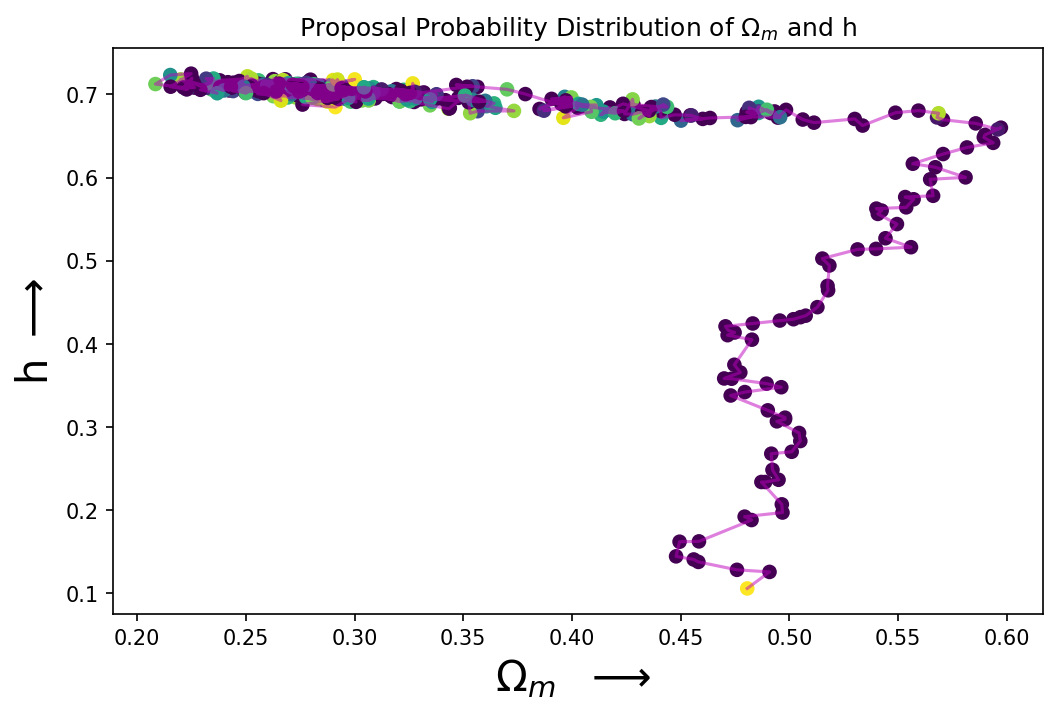

In [ ]:
# Rejecting Some initial Guasss

n_burn = int(Num_samples/10)
# Scatter plot of the samples:
plt.figure(figsize =[8, 5], dpi = 150)
plt.plot(Omega_m_accept, h_accept,c= 'm', alpha = 0.5)
plt.scatter(Omega_m_accept[:],h_accept[:], c = -np.exp(Prob[:]))

plt.title(r"Proposal Probability Distribution of $\Omega_m$ and h")
plt.xlabel(r'$\Omega_m  ~~ \longrightarrow$ ', fontsize = 20)
plt.ylabel(r'h $\longrightarrow$', fontsize = 20)
plt.savefig("Dis_fun.png")
plt.show()


# Plotting Histogram for $Ω_m $ and h from Proposed probability density function and calculating their corresponding mean, Standard deviation and also Covarince

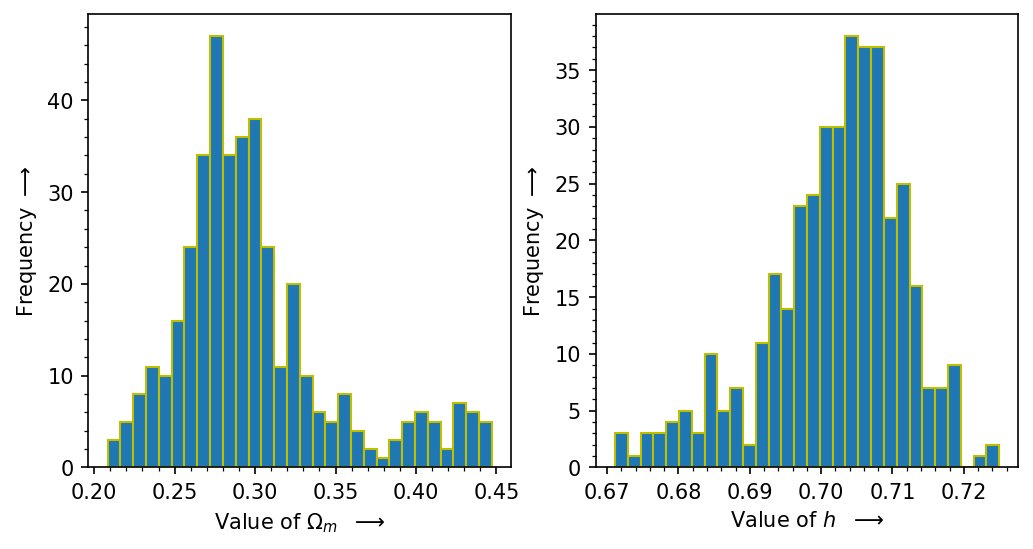


Mean of Omega_m = 0.2995709921584255                           Mean of h = 0.7019657859787582

Standard Deviation of Omega_m = 0.04942146772026199           Standard Deviation of h = 0.009690802151810944

Covariance of Omega_m and h = [[ 0.00937147 -0.0069893 ]
 [-0.0069893   0.01457347]]



In [ ]:
plt.figure(figsize = [8,4], dpi =150)
plt.subplot(121)
plt.hist(Omega_m_accept[n_burn:], bins = 30, ec = 'y')
plt.xlabel(r"Value of $\Omega_m ~~ \longrightarrow$")
plt.ylabel("Frequency $\longrightarrow$")
plt.minorticks_on()
plt.subplot(122)
plt.hist(h_accept[n_burn:], bins = 30, ec = 'y')
plt.xlabel(r"Value of $ h ~~ \longrightarrow$")
plt.ylabel("Frequency $\longrightarrow$")
plt.minorticks_on()
plt.savefig("hist.png")
plt.show()
print(f"""
Mean of Omega_m = {np.mean(Omega_m_accept[n_burn:])}                           Mean of h = {np.mean(h_accept[n_burn:])}

Standard Deviation of Omega_m = {np.std(Omega_m_accept[n_burn:])}           Standard Deviation of h = {np.std(h_accept[n_burn:])}

Covariance of Omega_m and h = {np.cov(Omega_m_accept, h_accept)}
""")

# Proposed Probability distribution for different variance of Gaussain Distribution function 

## For $σ = 0.001$

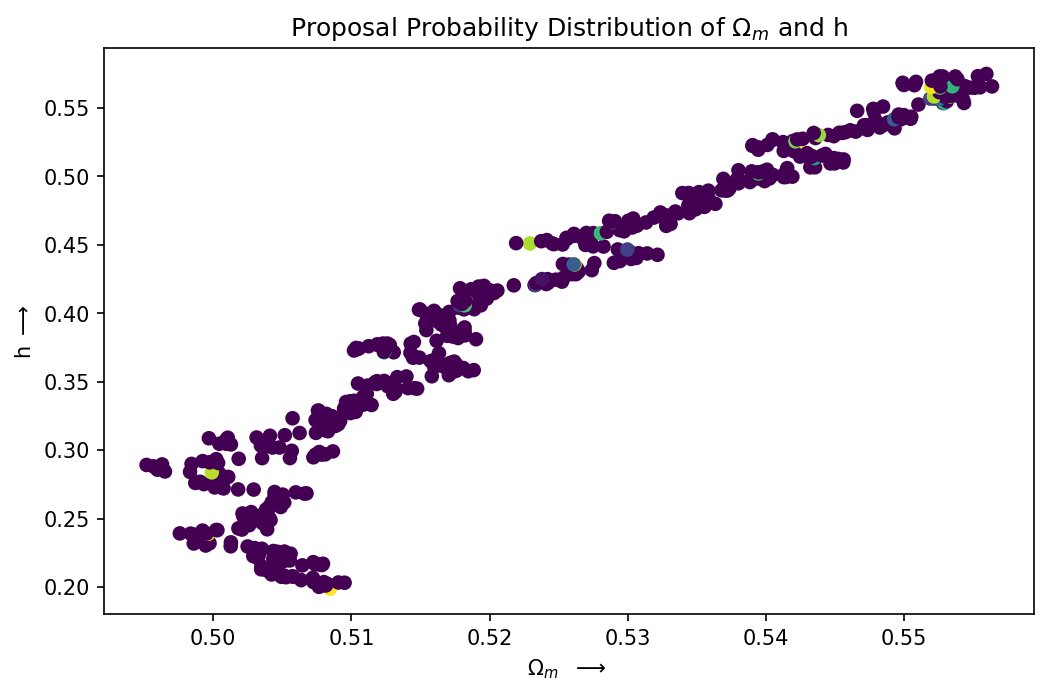

In [ ]:
# Starting Sample 
Num_samples = 1000
# Random initial Point
Omega_m_accept = [rnd.uniform(0, 1)]
h_accept = [rnd.uniform(0, 1)]
Prob = np.array([0])

for i in range(Num_samples):
    # Generating Random numbers
    Omega_m_rand = np.random.normal(Omega_m_accept[-1], 0.001)
    h_rand = np.random.normal(h_accept[-1], 0.001)
    # Variable for storing probability

    Log_New_Like = log_likelihood(h_rand, Omega_m_rand)

    Accept_prob = min(np.exp(Log_New_Like - log_likelihood(h_accept[-1], Omega_m_accept[-1])), 1)

    if rnd.uniform(0,1) < Accept_prob:
        h_accept = np.append(h_accept, h_rand)
        Omega_m_accept = np.append(Omega_m_accept, Omega_m_rand)
        Prob = np.append(Prob, Accept_prob)


# Rejecting Some initial Guasss

burn_in = int(Num_samples/10)

# Scatter plot of the samples:
plt.figure(figsize =[8, 5], dpi = 150)
#plt.plot(Omega_m_accept, h_accept,c= 'y', alpha = 0.5)
plt.scatter(Omega_m_accept[:],h_accept[:], c = -np.exp(Prob[:]))

plt.title(r"Proposal Probability Distribution of $\Omega_m$ and h")
plt.xlabel(r'$\Omega_m  ~~ \longrightarrow$ ')
plt.ylabel(r'h $\longrightarrow$')
plt.show()


## For $σ=100$

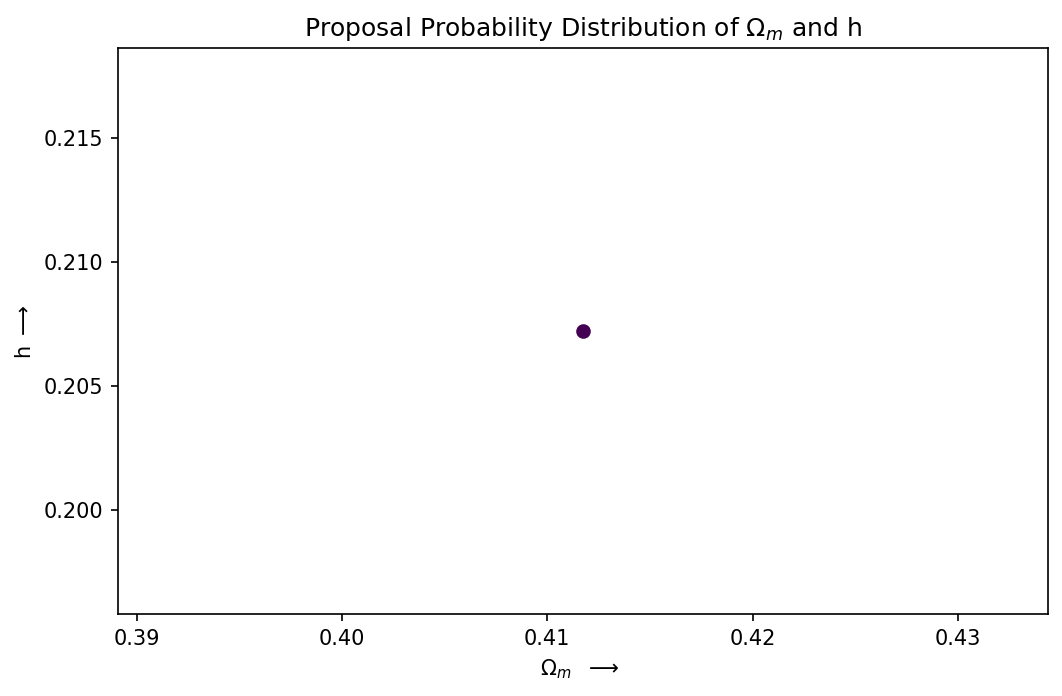

In [ ]:
# Starting Sample 
Num_samples = 1000
# Random initial Point
Omega_m_accept = [rnd.uniform(0, 1)]
h_accept = [rnd.uniform(0, 1)]
Prob = np.array([0])

for i in range(Num_samples):
    # Generating Random numbers
    Omega_m_rand = np.random.normal(Omega_m_accept[-1], 100)
    h_rand = np.random.normal(h_accept[-1], 100)
    # Variable for storing probability

    Log_New_Like = log_likelihood(h_rand, Omega_m_rand)

    Accept_prob = min(np.exp(Log_New_Like - log_likelihood(h_accept[-1], Omega_m_accept[-1])), 1)

    if rnd.uniform(0,1) < Accept_prob:
        h_accept = np.append(h_accept, h_rand)
        Omega_m_accept = np.append(Omega_m_accept, Omega_m_rand)
        Prob = np.append(Prob, Accept_prob)


# Rejecting Some initial Guasss

burn_in = int(Num_samples/10)

# Scatter plot of the samples:
plt.figure(figsize =[8, 5], dpi = 150)
#plt.plot(Omega_m_accept, h_accept,c= 'y', alpha = 0.5)
plt.scatter(Omega_m_accept[:],h_accept[:], c = -np.exp(Prob[:]))

plt.title(r"Proposal Probability Distribution of $\Omega_m$ and h")
plt.xlabel(r'$\Omega_m  ~~ \longrightarrow$ ')
plt.ylabel(r'h $\longrightarrow$')
plt.show()